In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 5
fig_height = 4
fig_format = 'png'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"

  # IPython 7.14 deprecated set_matplotlib_formats from IPython
  try:
    from matplotlib_inline.backend_inline import set_matplotlib_formats
  except ImportError:
    # Fall back to deprecated location for older IPython versions
    from IPython.display import set_matplotlib_formats
    
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'L2hvbWUvdWJ1bnR1L2FkNjg4X2dyb3VwNl9nZW9ncmFwaGljX2FuYWx5c2lzL2FkNjg4X2dyb3VwNl9nZW9ncmFwaGljX2FuYWx5c2lz'
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
globals()["__spec__"] = None

{"/usr/lib/python3.12/importlib/_bootstrap.py": 1755193641.0, "/usr/lib/python3.12/importlib/_bootstrap_external.py": 1755193641.0, "/usr/lib/python3.12/zipimport.py": 1755193641.0, "/usr/lib/python3.12/codecs.py": 1755193641.0, "/usr/lib/python3.12/encodings/aliases.py": 1755193641.0, "/usr/lib/python3.12/encodings/__init__.py": 1755193641.0, "/usr/lib/python3.12/encodings/utf_8.py": 1755193641.0, "/usr/lib/python3.12/abc.py": 1755193641.0, "/usr/lib/python3.12/io.py": 1755193641.0, "/usr/lib/python3.12/stat.py": 1755193641.0, "/usr/lib/python3.12/_collections_abc.py": 1755193641.0, "/usr/lib/python3.12/genericpath.py": 1755193641.0, "/usr/lib/python3.12/posixpath.py": 1755193641.0, "/usr/lib/python3.12/os.py": 1755193641.0, "/usr/lib/python3.12/_sitebuiltins.py": 1755193641.0, "/home/ubuntu/ad688_group6_geographic_analysis/.venv/lib/python3.12/site-packages/_distutils_hack/__init__.py": 1760104492.1123328, "/usr/lib/python3.12/sitecustomize.py": 1712727227.0, "/usr/lib/python3.12/sit

In [2]:
from pyspark.sql import SparkSession

# Start a Spark session
spark = SparkSession.builder.appName("JobPostingsAnalysis").getOrCreate()

# Load the CSV file into a Spark DataFrame
df = spark.read.option("header", "true").option("inferSchema", "true").option("multiLine","true").option("escape", "\"").csv("../data/lightcast_job_postings.csv")


Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


25/10/16 06:34:27 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


25/10/16 06:34:28 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


In [3]:
import pandas as pd
from pyspark.sql.functions import when, col

#Clean Data to convert to Pandas
columns_to_drop = ["ID", "BODY", "URL", "ACTIVE_URLS", "DUPLICATES", "LAST_UPDATED_TIMESTAMP",
    "NAICS2", "NAICS3", "NAICS4", "NAICS5", "NAICS6",
    "SOC_2", "SOC_3", "SOC_4", "SOC_5", "LAST_UPDATED_DATE", "LAST_UPDATED_TIMESTAMP", "EXPIRED", "SOURCE_TYPES", "SOURCES", "ACTIVE_SOURCES_INFO", "MODELED_EXPIRED", "MODELED_DURATION", "NAICS2_NAME", "NAICS3_NAME", "NAICS4_NAME", "NAICS5_NAME", "NAICS6_NAME",
    "SOC_2_NAME", "SOC_3_NAME", "SOC_4_NAME", "SOC_5_NAME", "EDUCATION_LEVELS", "MIN_EDULEVELS"
    
]
cleaned_data = df.drop(*columns_to_drop)

cleaned_data = cleaned_data.withColumn(
    "REMOTE_TYPE_NAME",
    when(col("REMOTE_TYPE_NAME") == "Remote", "Remote")
    .when(col("REMOTE_TYPE_NAME") == "Hybrid Remote", "Hybrid")
    .when(col("REMOTE_TYPE_NAME") == "[None]", "On-site")
    .when(col("REMOTE_TYPE_NAME").isNull(), "On-site")
    .when(col("REMOTE_TYPE_NAME") == "Not Remote", "On-site")
    .otherwise(col("REMOTE_TYPE_NAME"))
)

cleaned_data = cleaned_data.withColumn(
    "EMPLOYMENT_TYPE_NAME",
    when(col("EMPLOYMENT_TYPE_NAME") == "Part-time / full-time", "Flexible")
    .when(col("EMPLOYMENT_TYPE_NAME").isNull(), "Full-Time")
    .when(col("EMPLOYMENT_TYPE_NAME") == "Part-time (â‰¤ 32 hours)", "Part-Time")
    .when(col("EMPLOYMENT_TYPE_NAME") == "Full-time (> 32 hours)", "Full-Time")
    .otherwise(col("EMPLOYMENT_TYPE_NAME")) 
)

cleaned_data = cleaned_data.filter(col("NAICS_2022_2_NAME") != "Unclassified Industry")

median_salary = cleaned_data.approxQuantile("SALARY", [0.5], 0.01)[0]
cleaned_data = cleaned_data.withColumn(
    "SALARY",
    when(col("SALARY").isNull(), median_salary).otherwise(col("SALARY"))
)

#Convert to Pandas
clean_pdf = cleaned_data.toPandas()


25/10/16 06:34:48 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


In [4]:
#| echo: true
#| eval: true
# Cleaning empty rows and dropping columns that are mostly empty


fill_cols = ["CITY_NAME", "CITY", "LOCATION", "STATE", "STATE_NAME", "COMPANY", "COMPANY_NAME"]
clean_pdf[fill_cols] = clean_pdf[fill_cols].fillna("Unknown")

clean_pdf = clean_pdf.drop_duplicates(subset=["TITLE", "COMPANY", "LOCATION", "POSTED"], keep="first")

clean_pdf.dropna(thresh=len(clean_pdf)*0.5, axis=1, inplace=True)

#New Column to Classify AI Jobs and Add Month of Posting Date

ai_keywords = [
    "AI", "Machine Learning", "Data Scientist", "Data Analyst", "ML", 
    "Artificial Intelligence", "Deep Learning", "NLP", "Predictive Analytics"
]

#Function to classify AI vs Non-AI Jobs
def classify_ai(title):
    title_lower = str(title).lower()
    for keyword in ai_keywords:
        if keyword.lower() in title_lower:
            return "AI"
    return "Non-AI"

clean_pdf["AI_JOB"] = clean_pdf["TITLE_RAW"].apply(classify_ai)

clean_pdf["POSTED"] = pd.to_datetime(clean_pdf["POSTED"], errors="coerce")
clean_pdf["POSTED_MONTH"] = clean_pdf["POSTED"].dt.month

#Add column for URBAN vs RURAL

clean_pdf["URBAN_RURAL"] = clean_pdf["MSA_NAME"].apply(lambda x: "Urban" if pd.notnull(x) else "Rural")

    CLUSTER                                  NAICS_2022_2_NAME  count
13        0   Professional, Scientific, and Technical Services   2968
6         0                              Finance and Insurance   1720
1         0  Administrative and Support and Waste Managemen...   1598
10        0                                      Manufacturing    734
8         0                                        Information    696
..      ...                                                ...    ...
60        3                    Accommodation and Food Services    353
69        3            Management of Companies and Enterprises    146
71        3      Mining, Quarrying, and Oil and Gas Extraction     95
63        3                Arts, Entertainment, and Recreation     71
62        3         Agriculture, Forestry, Fishing and Hunting     45

[80 rows x 3 columns]


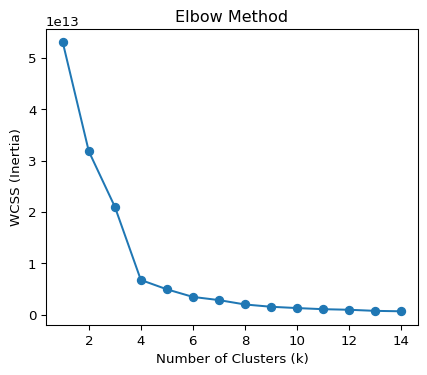

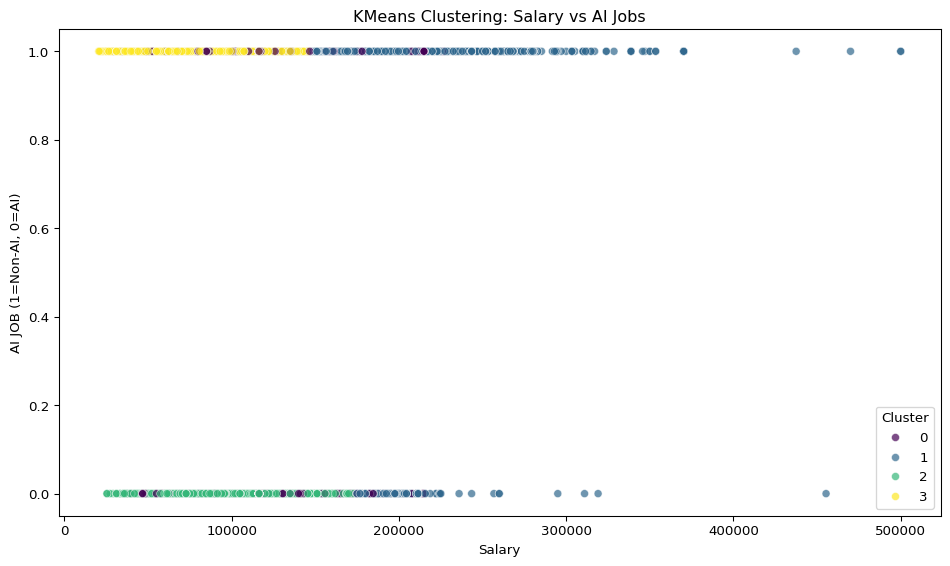

In [5]:
#KMeans clustering using NAICS as a reference but not a target

from sklearn.preprocessing import StandardScaler

# Select features
features = clean_pdf[["SALARY", "AI_JOB", "REMOTE_TYPE_NAME", "URBAN_RURAL"]]

# One-hot encode categorical columns
features_encoded = pd.get_dummies(features, columns=["AI_JOB", "REMOTE_TYPE_NAME", "URBAN_RURAL"], drop_first=True)

# Standardize numerical features (important for KMeans)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_encoded)

from sklearn.cluster import KMeans

k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
clean_pdf["CLUSTER"] = kmeans.fit_predict(features_scaled)

#Use Industry Name (NAICS2022) as a reference label

cluster_summary = (
    clean_pdf.groupby(["CLUSTER", "NAICS_2022_2_NAME"])
    .size()
    .reset_index(name="count")
    .sort_values(["CLUSTER", "count"], ascending=[True, False])
)

print(cluster_summary)

#Used an Elbow Method to choose the correct number of clusters

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Example features
X = features_encoded.values  # your numerical features

wcss = []
for k in range(1, 15):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    wcss.append(km.inertia_)

plt.plot(range(1, 15), wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.title('Elbow Method')
plt.show()

cluster_summary.head(20)  # Show top 20 to see patterns

one_hot_cols = ['AI_JOB_Non-AI', 'REMOTE_TYPE_NAME_On-site', 'REMOTE_TYPE_NAME_Remote', 'URBAN_RURAL_Urban']

clean_pdf = pd.concat([clean_pdf, features_encoded[one_hot_cols]], axis=1)


import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.scatterplot(
    data=clean_pdf,
    x='SALARY',
    y='AI_JOB_Non-AI',  
    hue='CLUSTER',
    palette='viridis',
    alpha=0.7
)
plt.title("KMeans Clustering: Salary vs AI Jobs")
plt.xlabel("Salary")
plt.ylabel("AI JOB (1=Non-AI, 0=AI)")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()


/tmp/ipykernel_5067/2483236018.py:14: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



NAICS_2022_6_NAME  Administrative Management and General Management Consulting Services  \
CLUSTER                                                                                   
0                                                                0.0                      
1                                                             1414.0                      
2                                                                0.0                      
3                                                             2139.0                      

NAICS_2022_6_NAME  Computer Systems Design Services  \
CLUSTER                                               
0                                               0.0   
1                                             376.0   
2                                             663.0   
3                                            2694.0   

NAICS_2022_6_NAME  Custom Computer Programming Services  \
CLUSTER                                                   
0   

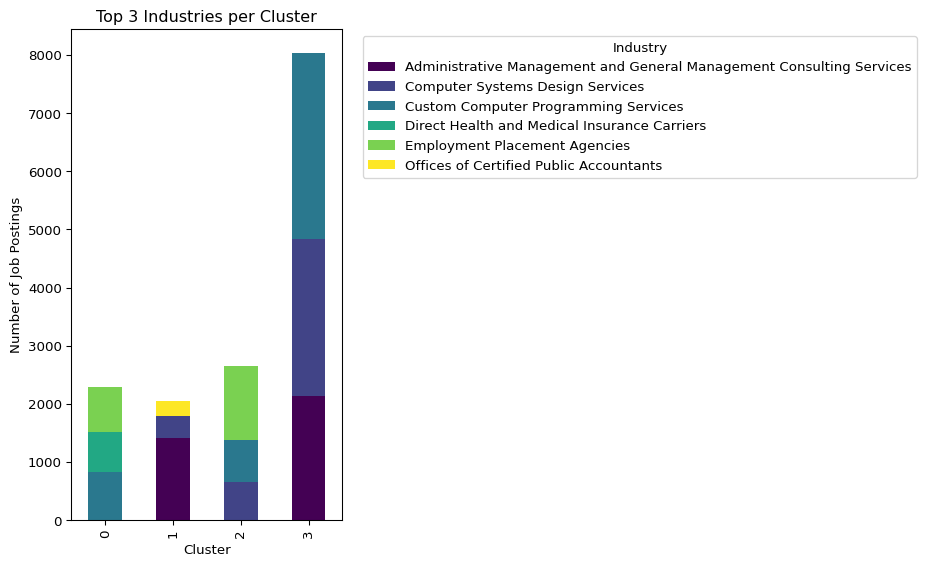

In [6]:
#Visualizing the NAICS Industries in reference to each cluster



import matplotlib.pyplot as plt


top_industries = (
    clean_pdf.groupby(["CLUSTER", "NAICS_2022_6_NAME"])
    .size()
    .reset_index(name="count")
)

top3 = top_industries.groupby("CLUSTER").apply(lambda x: x.nlargest(3, "count")).reset_index(drop=True)


pivot_df = top3.pivot(index="CLUSTER", columns="NAICS_2022_6_NAME", values="count").fillna(0)

print(pivot_df)

pivot_df.plot(kind='bar', stacked=True, figsize=(10,6), colormap="viridis")  

plt.title("Top 3 Industries per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Number of Job Postings")
plt.legend(title="Industry", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Evaulation Metrics:
RMSE: 29,689.15
R2: 0.006

Top PositiveInfluences on Salary:
                                              Feature  Coefficient
45                              STATE_NAME_Washington  6361.179175
5                              STATE_NAME_Connecticut  5837.080401
43                                 STATE_NAME_Vermont  5302.264696
3                               STATE_NAME_California  4726.943831
51                            REMOTE_TYPE_NAME_Remote  4274.612550
50                           REMOTE_TYPE_NAME_On-site  4176.813834
2                                 STATE_NAME_Arkansas  4109.440464
46  STATE_NAME_Washington, D.C. (District of Colum...  2818.294899
28                              STATE_NAME_New Jersey  2786.906817
11                                STATE_NAME_Illinois  2575.153394

Top Negative Influences on Salary:
                     Feature   Coefficient
49        STATE_NAME_Wyoming  -3610.797563
47  STATE_NAME_West Virginia  -3985.698913
22    STATE_NAME_

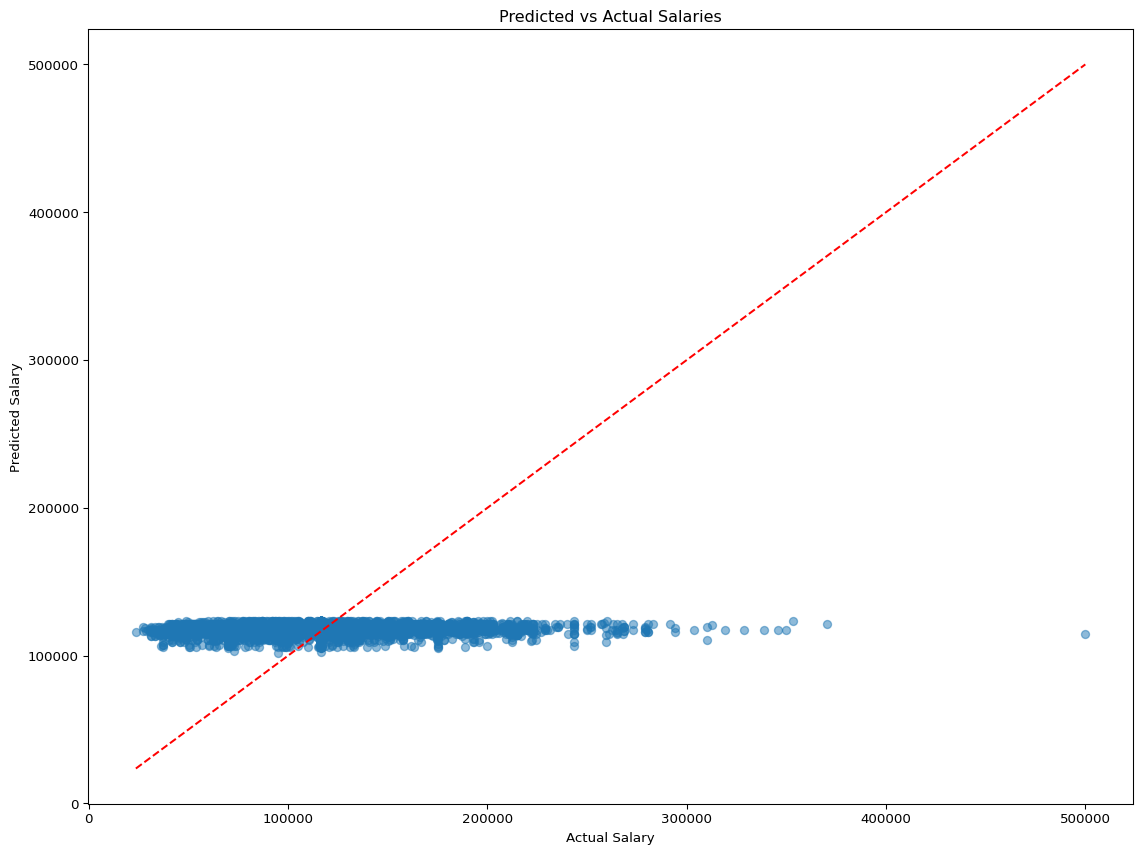

In [7]:
#Predicting Salaries based on Location Data through Linear Regression
#*Decided to run it in Pandas with Scikit as it's already been converted and cleaned

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

reg_data = clean_pdf[["SALARY", "STATE_NAME", "REMOTE_TYPE_NAME", "URBAN_RURAL"]]

X = pd.get_dummies(reg_data[["STATE_NAME", "REMOTE_TYPE_NAME", "URBAN_RURAL"]], drop_first=True)
y = reg_data["SALARY"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Evaulation Metrics:")
print(f"RMSE: {rmse:,.2f}")
print(f"R2: {r2:.3f}")

df_coef = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
}).sort_values(by="Coefficient", ascending=False)

print("\nTop PositiveInfluences on Salary:")
print(df_coef.head(10))

print("\nTop Negative Influences on Salary:")
print(df_coef.tail(10))


plt.figure(figsize=(12,9))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Predicted vs Actual Salaries")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.tight_layout()
plt.show()
